In [49]:
import mne
import numpy as np
from mne.channels import make_standard_montage
import matplotlib.pyplot as plt
from mne.datasets import eegbci

raw = mne.io.read_raw_bdf("C:\\Users\\pipo_\\OneDrive\\Desktop\\test_data\\s9999_ssvep_harmonic_block01.bdf")

eegbci.standardize(raw)  # set channel names
montage = make_standard_montage("biosemi64")

raw.set_montage(montage, on_missing='ignore')

Extracting EDF parameters from C:\Users\pipo_\OneDrive\Desktop\test_data\s9999_ssvep_harmonic_block01.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...


Measurement date,"July 04, 2024 13:00:23 GMT"
Experimenter,Unknown
Participant,
Digitized points,67 points
Good channels,"72 EEG, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,104.00 Hz


Effective window size : 4.000 (s)


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


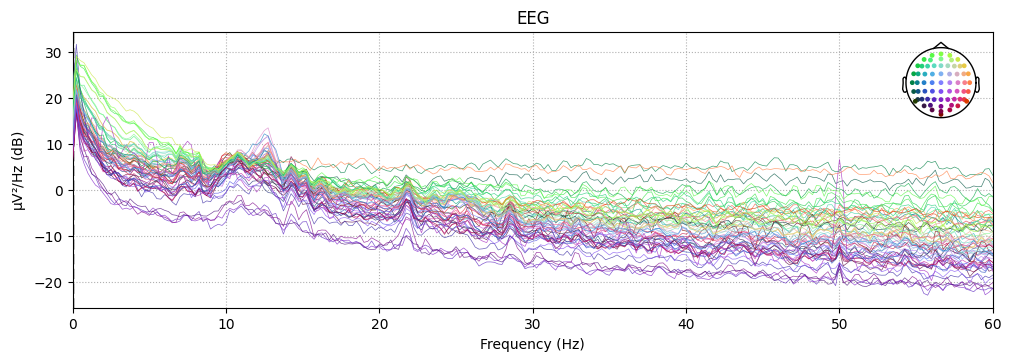

In [50]:
raw.compute_psd(fmax=60).plot(picks=raw.ch_names[0:64])
plt.show()

In [51]:
events_raw = mne.find_events(raw, shortest_event = 0)

events = events_raw

event_dict =  {'start': 101,
}

Trigger channel STATUS has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
80 events found on stim channel STATUS
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40 101]


In [52]:
events_raw[:50]

array([[10628,     0,     1],
       [10898,     0,   101],
       [12967,     0,     2],
       [13225,     0,   101],
       [15283,     0,     3],
       [15540,     0,   101],
       [17596,     0,     4],
       [17853,     0,   101],
       [19908,     0,     5],
       [20166,     0,   101],
       [22223,     0,     6],
       [22480,     0,   101],
       [24534,     0,     7],
       [24792,     0,   101],
       [26848,     0,     8],
       [27105,     0,   101],
       [29159,     0,     9],
       [29416,     0,   101],
       [31470,     0,    10],
       [31728,     0,   101],
       [33781,     0,    11],
       [34038,     0,   101],
       [36093,     0,    12],
       [36350,     0,   101],
       [38405,     0,    13],
       [38662,     0,   101],
       [40716,     0,    14],
       [40974,     0,   101],
       [43027,     0,    15],
       [43284,     0,   101],
       [45340,     0,    16],
       [45598,     0,   101],
       [47651,     0,    17],
       [47

In [53]:
Epochs = mne.Epochs(raw, events, 
    tmin= -1.0,  
    tmax= 3.0,    
    event_id=event_dict,
    preload = True,
    event_repeated='drop',
    baseline=(-1.0, 0.0),
    verbose=True
    )

Not setting metadata
40 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 40 events and 2049 original time points ...
0 bad epochs dropped


In [54]:
Epochs

Number of events,40
Events,start: 40
Time range,-1.000 – 3.000 s
Baseline,-1.000 – 0.000 s


    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


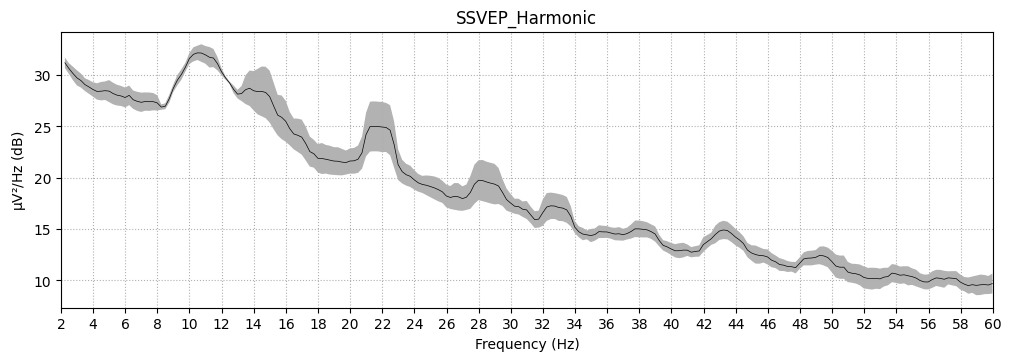

In [55]:
occ_related_electrodes = ['O1','Oz','O2']
# Compute the PSD
psd = Epochs['start'].pick(occ_related_electrodes).compute_psd(fmin=2.0, fmax=60.0)

# Plot the PSD
fig = psd.plot(average=True, amplitude=False, picks="data", exclude="bads")

# Customize the x-axis labels
ax = fig.axes[0]  # Get the axis of the first subplot
ax.set_xticks(np.arange(2, 61, 2))  # Set x-axis ticks from 2 to 60
ax.set_xticklabels(np.arange(2, 61, 2))  # Set x-axis labels from 2 to 60
ax.set_title('SSVEP_Harmonic')

plt.show()

C:\Users\pipo_\AppData\Local\Temp\ipykernel_23336\3760618489.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  selected_data = Epochs['start'].pick(['Oz']).get_data()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


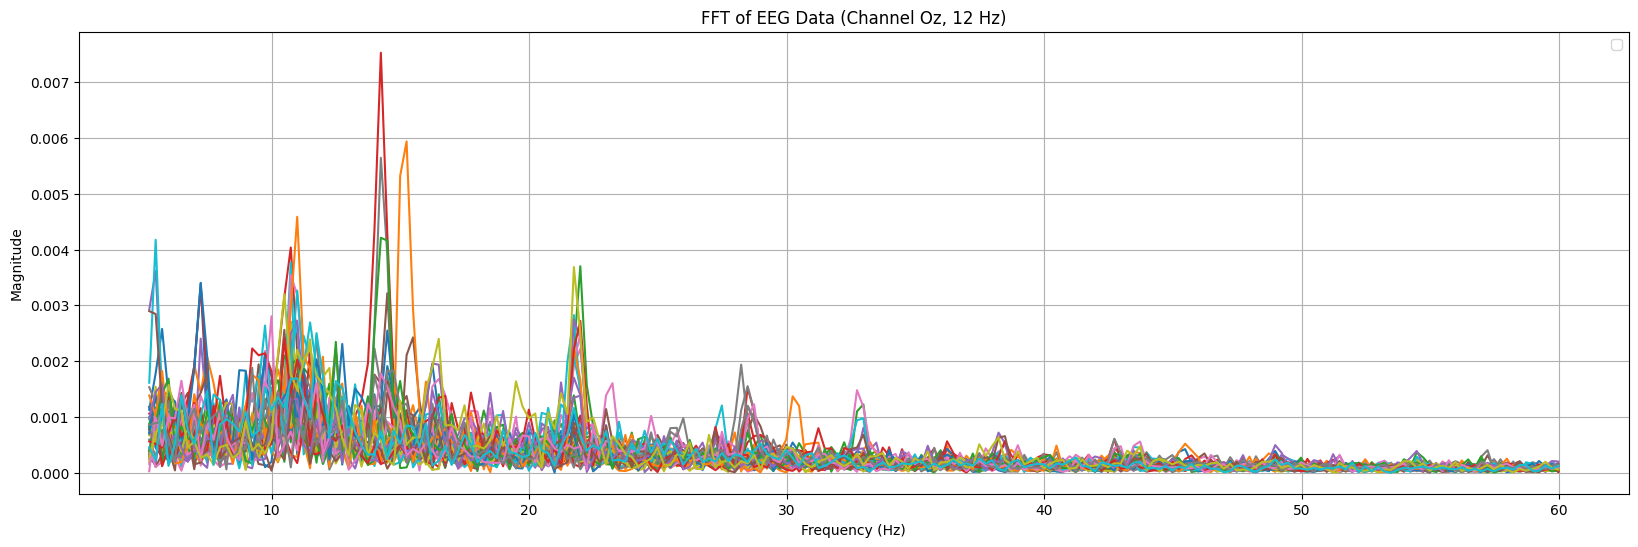

In [56]:
# Compute FFT
sampling_rate = 512
selected_data = Epochs['start'].pick(['Oz']).get_data()
plt.figure(figsize=(20, 6))

for epoch in range(selected_data.shape[0]):
    fft_result = np.fft.fft(selected_data[epoch,0,:])
    fft_magnitude = np.abs(fft_result)  # Magnitude of the FFT
    fft_frequency = np.fft.fftfreq(selected_data.shape[2], 1/sampling_rate)  # Frequency axis

    # Filter the frequencies between 5 Hz and 60 Hz
    freq_mask = (fft_frequency >= 5) & (fft_frequency <= 60)

    # Apply the mask to filter the magnitudes and frequencies
    filtered_magnitude = fft_magnitude[freq_mask]
    filtered_frequency = fft_frequency[freq_mask]

    # Plot the FFT for this epoch
    plt.plot(filtered_frequency, filtered_magnitude)

# Customize the plot
plt.title(f'FFT of EEG Data (Channel Oz, 12 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()
